In [ ]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob


from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

In [53]:
df_saiene_kakakusa = pd.read_csv('../../卒論関連書類/データ/抽出＿分析データ/再エネ誤差と価格差/select_renewable1.csv')
df_yobiritsu_saiene_kakakusa = pd.read_csv('../../卒論関連書類/データ/抽出＿分析データ/再エネ誤差_予備率_価格差/再エネ誤差_予備率_価格差1.csv')

In [64]:
def PLOT_3D(x,y,z,x_label,y_label,z_label):

    fig = plt.figure(figsize=(6,6))
    ax= fig.add_subplot(111,projection = "3d")
    ax.set_xlabel(x_label,fontsize =10)
    ax.set_ylabel(y_label,fontsize =10)
    ax.set_zlabel(z_label,fontsize =10,labelpad=-1.1,rotation=90)
    ax.tick_params(axis='z', labelrotation= 45)
    ax.scatter(x,y,z)
    ax.view_init(30, 30)

def PLOT2d(x,y,x_label,y_label):
    fig = plt.figure(figsize=(6,6))
    ax= fig.add_subplot()
    ax.set_xlabel(x_label,fontsize =10)
    ax.set_ylabel(y_label,fontsize =10)
    
    ax.scatter(x,y)


    # plt.show()

In [ ]:
df_saiene_kakakusa.columns

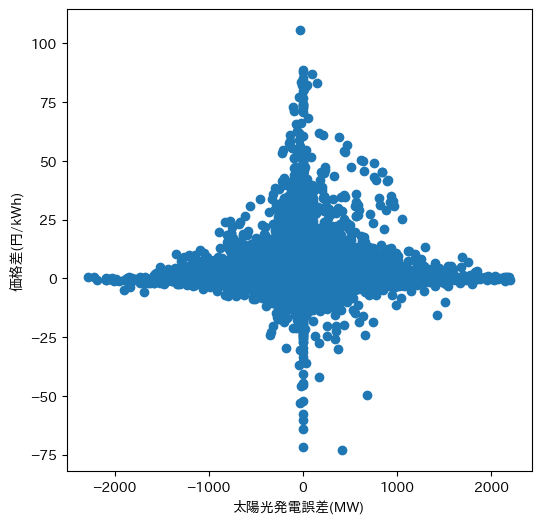

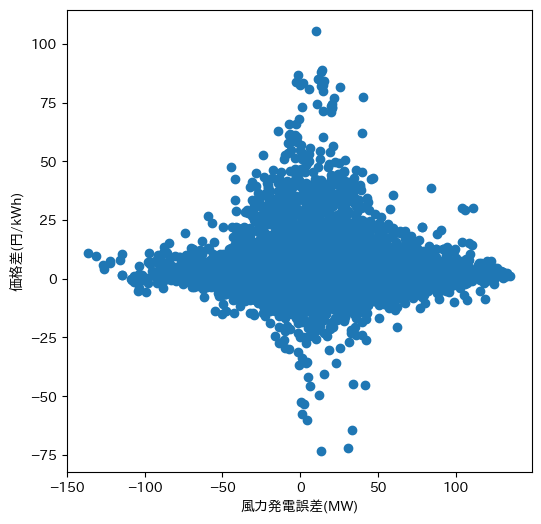

In [68]:
# 太陽光と価格差,風力と価格差
solar_error_big =df_saiene_kakakusa['太陽光発電誤差(MW)(実績-想定)'].values
wind_error_big =df_saiene_kakakusa['風力発電誤差(MW)(実績-想定)'].values
gap_big = df_saiene_kakakusa['gap_price[intra-spot](円/kWh)'].values

x,y,z= solar_error_big,wind_error_big,gap_big
x_label,y_label,z_label = '太陽光発電誤差(MW)','風力発電誤差(MW)','価格差(円/kWh)'

PLOT2d(x,z,x_label,z_label)
# plt.savefig('../../../../Desktop/share_images/三軸＿share/太陽光_価格差.png')
PLOT2d(y,z,y_label,z_label)
# plt.savefig('../../../../Desktop/share_images/三軸＿share/風力_価格差.png')

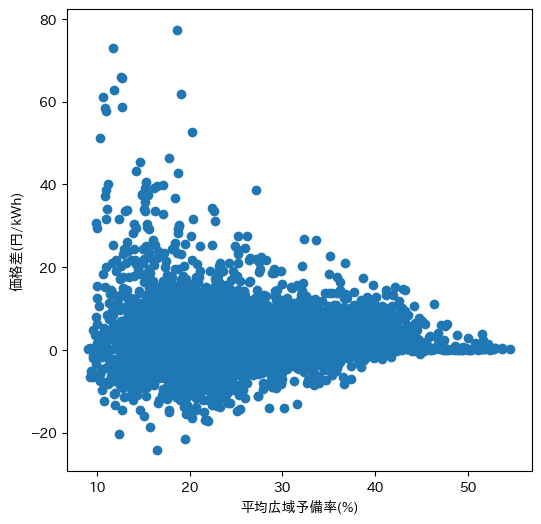

In [70]:
# 予備率と価格差
renew_error_select = df_yobiritsu_saiene_kakakusa['再エネ発電誤差(MW)(実績-想定)']
yobiritsu_select = df_yobiritsu_saiene_kakakusa['平均広域予備率(%)']
gap_select = df_yobiritsu_saiene_kakakusa['gap_price[intra-spot](円/kWh)']

x,y,z= renew_error_select,yobiritsu_select,gap_select
x_label,y_label,z_label = '再エネ発電誤差(MW)','平均広域予備率(%)','価格差(円/kWh)'

PLOT2d(y,z,y_label,z_label)
plt.savefig('../../../../Desktop/share_images/三軸＿share/予備率_価格差.png')

In [ ]:
solar_error_big =df_saiene_kakakusa['太陽光発電誤差(MW)(実績-想定)'].values
wind_error_big =df_saiene_kakakusa['風力発電誤差(MW)(実績-想定)'].values
gap_big = df_saiene_kakakusa['gap_price[intra-spot](円/kWh)'].values
x,y,z= solar_error_big,wind_error_big,gap_big
x_label,y_label,z_label = 'x','y','z'

In [ ]:
renew_error_select = df_yobiritsu_saiene_kakakusa['再エネ発電誤差(MW)(実績-想定)']
yobiritsu_select = df_yobiritsu_saiene_kakakusa['平均広域予備率(%)']
gap_select = df_yobiritsu_saiene_kakakusa['gap_price[intra-spot](円/kWh)']

x,y,z= renew_error_select,yobiritsu_select,gap_select
x_label,y_label,z_label = '再エネ発電誤差(MW)','平均広域予備率(%)','価格差(円/kWh)'
PLOT_3D(x,y,z,x_label,y_label,z_label)
plt.savefig('../../../../Desktop/share_images/三軸＿share/三軸全体_再エネ_予備率_価格差.png')

In [ ]:
# 太陽誤差と風力誤差と価格差　フィルターあり
df_select_yobiritsu_renewable = df_saiene_kakakusa
volume_spot = df_select_yobiritsu_renewable['spot_volume(kWh)'].values
min_volume_spot =np.min(volume_spot)
max_volume_spot = np.max(volume_spot)
# 1000MWhずつのとき1000*1000
MWh_range = 500*1000/4
plot_num =int((max_volume_spot-min_volume_spot)/MWh_range)

for num in range(0,plot_num):
    start_point = min_volume_spot+MWh_range*num
    end_point=min_volume_spot+MWh_range*(num+1)

    df= df_select_yobiritsu_renewable[(df_select_yobiritsu_renewable['spot_volume(kWh)']>start_point) & (df_select_yobiritsu_renewable['spot_volume(kWh)']<end_point)]

    gap_big =df['gap_price[intra-spot](円/kWh)'].values
    # renew_error_select = df['再エネ発電誤差(MW)(実績-想定)'].values/30 #30分の一縮尺
    # yobiritsu_select = df['平均広域予備率(%)'].values
    solar_error_big = df['太陽光発電誤差(MW)(実績-想定)'].values
    wind_error_big = df['風力発電誤差(MW)(実績-想定)'].values
    
    x,y,z= solar_error_big,wind_error_big,gap_big
    x_label,y_label,z_label = '太陽光発電誤差(MW)','風力発電誤差(MW)','価格差(円/kWh)'

    PLOT_3D(x,y,z,x_label,y_label,z_label)
    plt.savefig(f'../../../../Desktop/share_images/三軸＿share/三軸_スポットフィルター_太陽光_風力_価格差/三軸_スポットフィルター_太陽光_風力_価格差{num}.png')
        



In [ ]:
# 予備率の方の三軸プロット　フィルターあり
df_select_yobiritsu_renewable = df_yobiritsu_saiene_kakakusa
volume_spot = df_select_yobiritsu_renewable['spot_volume(kWh)'].values
min_volume_spot =np.min(volume_spot)
max_volume_spot = np.max(volume_spot)
# 1000MWhずつのとき1000*1000
MWh_range = 500*1000*1
plot_num =int((max_volume_spot-min_volume_spot)/MWh_range)

for num in range(0,plot_num):
    start_point = min_volume_spot+MWh_range*num
    end_point=min_volume_spot+MWh_range*(num+1)

    df= df_select_yobiritsu_renewable[(df_select_yobiritsu_renewable['spot_volume(kWh)']>start_point) & (df_select_yobiritsu_renewable['spot_volume(kWh)']<end_point)]

    gap_select =df['gap_price[intra-spot](円/kWh)'].values
    renew_error_select = df['再エネ発電誤差(MW)(実績-想定)'].values/30 #30分の一縮尺
    yobiritsu_select = df['平均広域予備率(%)'].values
    # solar_error = df['太陽光発電誤差(MW)(実績-想定)'].values
    # wind_error = df['風力発電誤差(MW)(実績-想定)'].values
    
    x,y,z= renew_error_select,yobiritsu_select,gap_select
    x_label,y_label,z_label = '再エネ発電誤差(MW)','平均広域予備率(%)','価格差(円/kWh)'
    PLOT_3D(x,y,z,x_label,y_label,z_label)
    plt.savefig(f'../../../../Desktop/share_images/三軸＿share/三軸_スポットフィルター_再エネ_予備率_価格差/三軸_スポットフィルター_再エネ_予備率_価格差{num}.png')
        



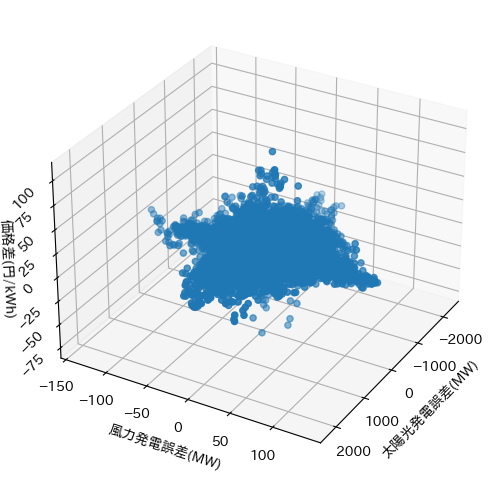

In [55]:
solar_error_big =df_saiene_kakakusa['太陽光発電誤差(MW)(実績-想定)'].values
wind_error_big =df_saiene_kakakusa['風力発電誤差(MW)(実績-想定)'].values
gap_big = df_saiene_kakakusa['gap_price[intra-spot](円/kWh)'].values

x,y,z= solar_error_big,wind_error_big,gap_big
x_label,y_label,z_label = '太陽光発電誤差(MW)','風力発電誤差(MW)','価格差(円/kWh)'

PLOT_3D(x,y,z,x_label,y_label,z_label)
# plt.savefig('../../../../Desktop/share_images/三軸＿share/三軸全体_太陽光_風力_価格差.png')

In [58]:
def PLOT2d(x,y,x_label,y_label):
    fig = plt.figure(figsize=(6,6))
    ax= fig.add_subplot()
    ax.set_xlabel(x_label,fontsize =10)
    ax.set_ylabel(y_label,fontsize =10)
    
    ax.scatter(x,y)


    plt.show()

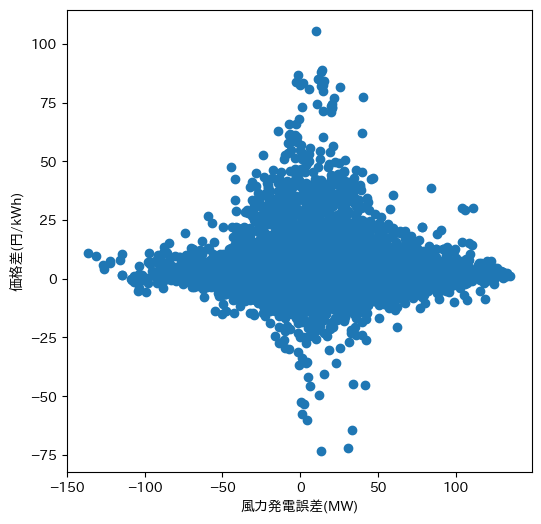

In [66]:
PLOT2d(y,z,y_label,z_label)
plt.savefig('../../../../Desktop/share_images/三軸＿share/風力_価格差.png')

In [ ]:

fig = plt.figure(figsize=(6,6))
ax= fig.add_subplot(111,projection = "3d")
ax.set_xlabel(x_label,fontsize =10)
ax.set_ylabel(y_label,fontsize =10)
ax.set_zlabel(z_label,fontsize =10,labelpad=-1.1,rotation=90)
ax.tick_params(axis='z', labelrotation= 45)
ax.scatter(x,y,z)
ax.view_init(30, 30)



In [ ]:
x,y,z= solar_error_big,wind_error_big,gap_big
x_label,y_label,z_label = '太陽光発電誤差(MW)','風力発電誤差(MW)','価格差(円/kWh)'

PLOT_3D(x,y,z,x_label,y_label,z_label)
plt.savefig('../../../../Desktop/share_images/三軸＿share/三軸全体_太陽光_風力_価格差.png')

In [72]:
df_select_yobiritsu_renewable.dropna()

,DateTime,intra_price(円/kWh),spot_price(円/kWh),gap_price[intra-spot](円/kWh),intra_volume（MWh/h）,spot_volume(kWh),北電太陽光想定(MW),北電風力想定(MW),北電太陽光実績(MW),北電風力実績(MW),...,中国風力想定(kWh),中国太陽光実績(kWh),中国風力実績(kWh),太陽光想定合計(MW),太陽光実績合計(MW),風力想定合計(MW),風力実績合計(MW),太陽光発電誤差(MW)(実績-想定),風力発電誤差(MW)(実績-想定),再エネ発電誤差(MW)(実績-想定)
0,2018-04-01 00:00:00,7.62,7.30,0.32,58.8,6098500,0.0,0.0,0.0,0.0,...,39041.0,0.0,38993.0,0.0,0.0,52.217453,60.116050,0.0,7.898598,7.898598
1,2018-04-01 00:30:00,7.52,6.93,0.59,54.0,6225500,0.0,0.0,0.0,0.0,...,41624.0,0.0,40253.0,0.0,0.0,53.499715,60.979550,0.0,7.479835,7.479835
2,2018-04-01 01:00:00,7.50,6.78,0.72,57.3,6356500,0.0,0.0,0.0,0.0,...,43205.0,0.0,37977.0,0.0,0.0,54.379215,58.935150,0.0,4.555935,4.555935
3,2018-04-01 01:30:00,7.56,6.84,0.72,63.0,6439500,0.0,0.0,0.0,0.0,...,43721.0,0.0,39237.0,0.0,0.0,54.699725,60.822200,0.0,6.122475,6.122475
4,2018-04-01 02:00:00,6.89,6.92,-0.03,61.6,6439000,0.0,0.0,0.0,0.0,...,43721.0,0.0,37666.0,0.0,0.0,54.689482,56.787700,0.0,2.098217,2.098217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78906,2022-09-30 21:30:00,18.08,20.00,-1.92,787.4,17410950,0.0,71.2,0.0,75.1,...,11577.0,0.0,2465.0,0.0,0.0,83.675689,99.277615,0.0,15.601926,15.601926
78907,2022-09-30 22:00:00,20.13,20.00,0.13,1323.0,16709950,0.0,73.3,0.0,79.6,...,10829.0,0.0,4302.0,0.0,0.0,84.692511,102.935115,0.0,18.242604,18.242604
78908,2022-09-30 22:30:00,17.88,17.31,0.57,897.1,16285700,0.0,75.3,0.0,82.0,...,13621.0,0.0,2447.0,0.0,0.0,87.881019,104.574615,0.0,16.693596,16.693596
78909,2022-09-30 23:00:00,17.35,17.06,0.29,933.0,16031850,0.0,77.0,0.0,84.6,...,14413.0,0.0,1386.0,0.0,0.0,89.632136,103.509615,0.0,13.877479,13.877479


In [73]:
df_yobiritsu_saiene_kakakusa

,Unnamed: 0,DateTime,intra_price(円/kWh),spot_price(円/kWh),gap_price[intra-spot](円/kWh),intra_volume（MWh/h）,spot_volume(kWh),北電太陽光想定(MW),北電風力想定(MW),北電太陽光実績(MW),...,四国予備率(%),九州予備率(%),太陽光想定合計(MW),太陽光実績合計(MW),風力想定合計(MW),風力実績合計(MW),太陽光発電誤差(MW)(実績-想定),風力発電誤差(MW)(実績-想定),再エネ発電誤差(MW)(実績-想定),平均広域予備率(%)
0,69709,2022-03-21 00:00:00,26.04,26.69,-0.65,1049.2,14127100,0.0,60.8,0.0,...,21.35,21.35,0.0,0.0,95.187729,89.082367,0.0,-6.105361,-6.105361,21.350000
1,69710,2022-03-21 00:30:00,24.71,23.54,1.17,1016.3,14175050,0.0,61.2,0.0,...,22.82,22.82,0.0,0.0,93.995500,78.889173,0.0,-15.106327,-15.106327,22.820000
2,69711,2022-03-21 01:00:00,25.03,23.54,1.49,1051.3,14276500,0.0,60.6,0.0,...,22.77,22.77,0.0,0.0,93.142500,72.530418,0.0,-20.612082,-20.612082,22.673333
3,69712,2022-03-21 01:30:00,24.96,23.91,1.05,1088.2,14363200,0.0,60.9,0.0,...,22.26,22.26,0.0,0.0,93.518000,81.427918,0.0,-12.090082,-12.090082,22.260000
4,69713,2022-03-21 02:00:00,26.46,23.91,2.55,1062.8,14340250,0.0,62.3,0.0,...,21.83,21.83,0.0,0.0,95.930729,73.353673,0.0,-22.577055,-22.577055,21.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,79016,2022-09-30 21:30:00,18.08,20.00,-1.92,787.4,17410950,0.0,71.2,0.0,...,27.99,27.99,0.0,0.0,83.675689,99.277615,0.0,15.601926,15.601926,32.960000
9308,79017,2022-09-30 22:00:00,20.13,20.00,0.13,1323.0,16709950,0.0,73.3,0.0,...,29.77,29.77,0.0,0.0,84.692511,102.935115,0.0,18.242604,18.242604,33.890000
9309,79018,2022-09-30 22:30:00,17.88,17.31,0.57,897.1,16285700,0.0,75.3,0.0,...,31.20,31.20,0.0,0.0,87.881019,104.574615,0.0,16.693596,16.693596,34.650000
9310,79019,2022-09-30 23:00:00,17.35,17.06,0.29,933.0,16031850,0.0,77.0,0.0,...,32.50,32.50,0.0,0.0,89.632136,103.509615,0.0,13.877479,13.877479,34.911111
